# Megatutorial 2: Clustering

In [101]:
from pandas import read_csv

In [102]:
data = read_csv("../data/fake_profiles.csv", index_col=0)

In [103]:
data.head()

,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake
0,yes,0.27,0,0.0,no,53,no,no,32,1000.0,955,no
1,yes,0.00,2,0.0,no,44,no,no,286,2740.0,533,no
2,yes,0.10,2,0.0,no,0,no,yes,13,159.0,98,no
3,yes,0.00,1,0.0,no,82,no,no,679,414.0,651,no
4,yes,0.00,2,0.0,no,0,no,yes,6,151.0,126,no


In [104]:
# normalerweise spalten wir die Daten horizontal und vertikal auf. Eine Spalte ist das target(y), der rest sind die features (x)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   profile_pic                    576 non-null    object 
 1   rel_num_numeric_char_username  576 non-null    float64
 2   words_fullname                 576 non-null    int64  
 3   rel_num_numeric_char_fullname  576 non-null    float64
 4   name=username                  576 non-null    object 
 5   description_length             576 non-null    int64  
 6   has_external_url               576 non-null    object 
 7   is_private                     576 non-null    object 
 8   num_posts                      576 non-null    int64  
 9   num_followers                  556 non-null    float64
 10  num_follows                    576 non-null    int64  
 11  is_fake                        576 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 58.5+ 

In [106]:
data.columns

Index(['profile_pic', 'rel_num_numeric_char_username', 'words_fullname',
       'rel_num_numeric_char_fullname', 'name=username', 'description_length',
       'has_external_url', 'is_private', 'num_posts', 'num_followers',
       'num_follows', 'is_fake'],
      dtype='object')

In [107]:
target = [
    "is_fake"
    ]

features = [
    'rel_num_numeric_char_username', 'words_fullname',
       'rel_num_numeric_char_fullname', 'description_length']

# nun horizontales slicing gemacht

In [108]:
y = data[target]
X = data[features]

In [109]:
# weil unsupervised, müssen wir das y (target) nicht beachten, wir arbeiten nur mit dem feature

## Clustering in Scikit-Learn

In [110]:
# kMeans, agglomerative clustering sind estimators
from sklearn.cluster import KMeans, AgglomerativeClustering
# KMeans ist Klasse (CamelCase), Agglomerative Clustering auch.
# jeder Estimator ist eine Klasse (eigenständig)

In [111]:
kmeans_engine = KMeans(n_clusters=3)

kmeans_engine.fit(X)
clusters = kmeans_engine.predict(X)


In [112]:
X["cluster"] = clusters

/tmp/ipykernel_13444/3748292019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


/workspaces/data-science-SS25/.venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='description_length', ylabel='words_fullname'>

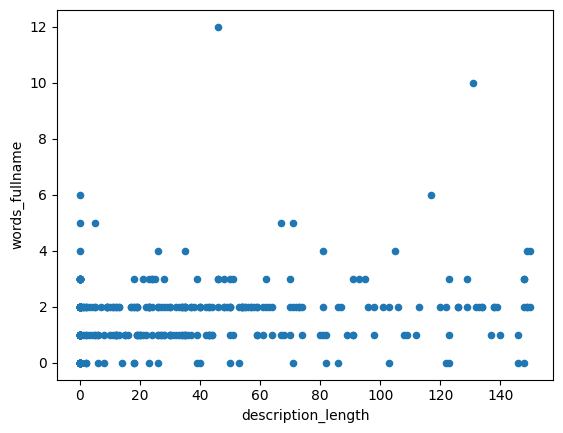

In [113]:
X.plot(kind = "scatter", 
       x = "description_length",
       y = "words_fullname", 
       colormap = "inferno"
       )

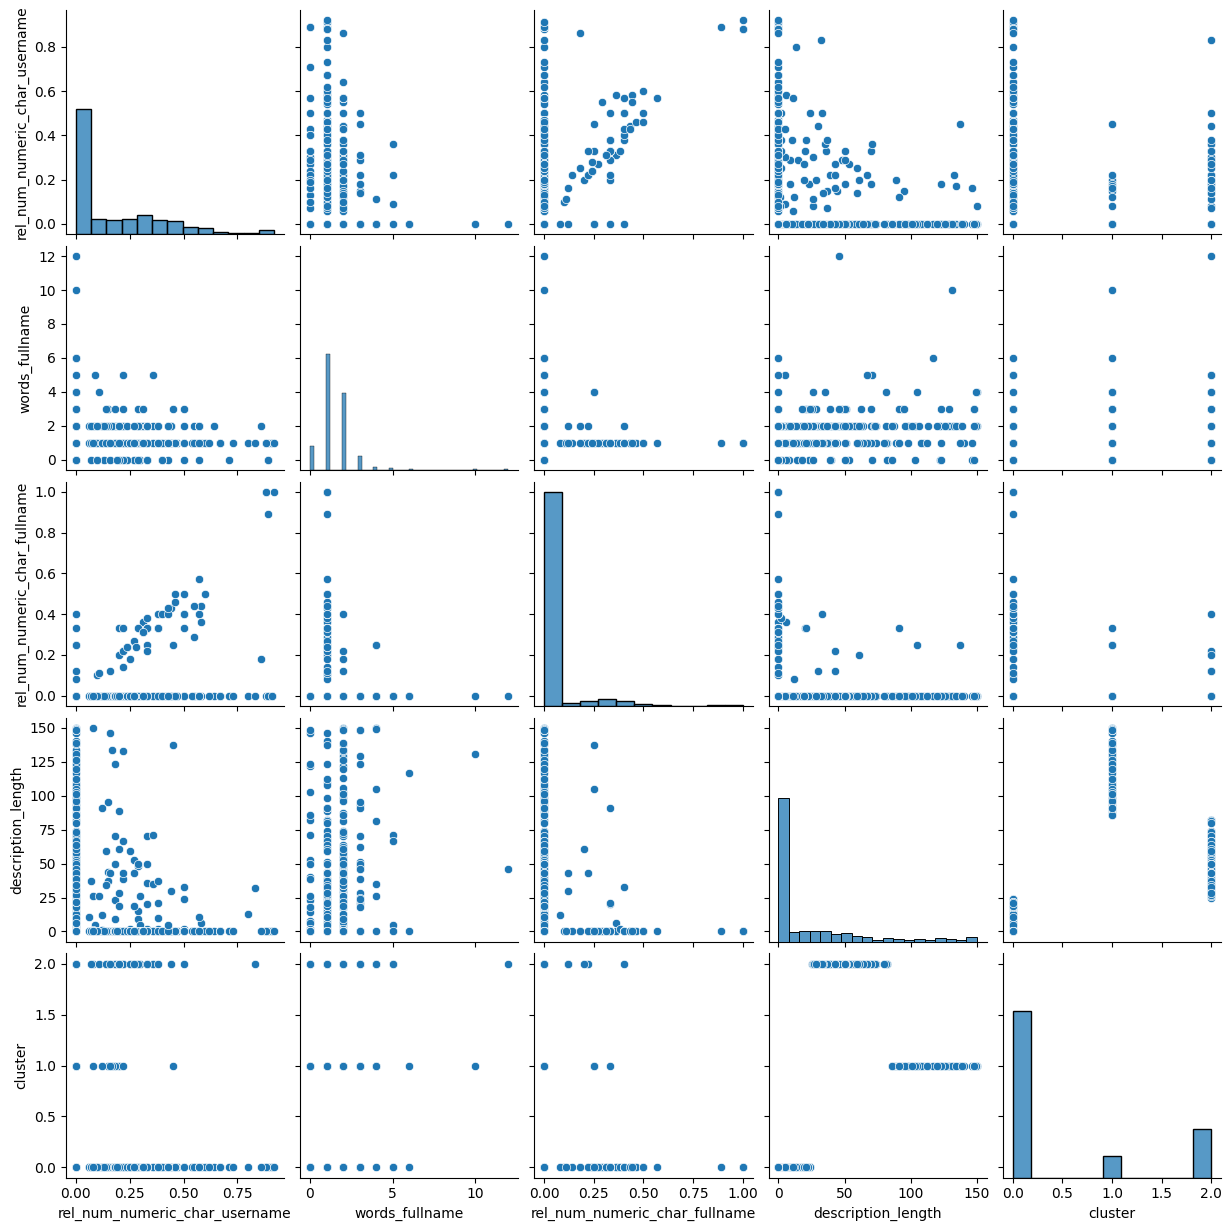

In [114]:
from seaborn import pairplot
pairplot(X)
# pairplot ist eine Funktion, die ein DataFrame erwartet

In [115]:
clusters

array([2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,

In [116]:
hierarchical_engine = AgglomerativeClustering(n_clusters=2)
# KMeans-Klasse = kmeans_engine
hierarchical_engine.fit_predict(X)


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Clustering in Scipy

In [117]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt


In [118]:
Z = hierarchy.linkage(X, method='ward')

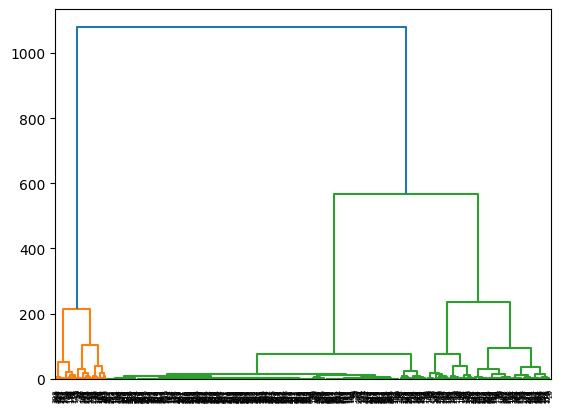

In [119]:
hierarchy.dendrogram(Z)
plt.show()